Training R-squared: 0.75
Testing R-squared: 0.67
Training MSE: 21.64
Testing MSE: 24.29


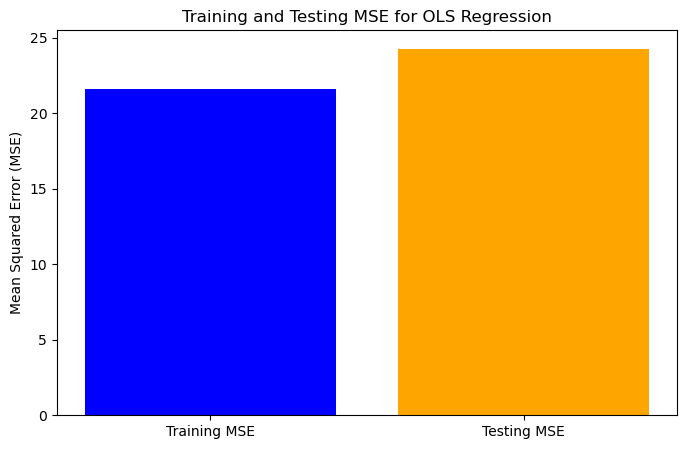

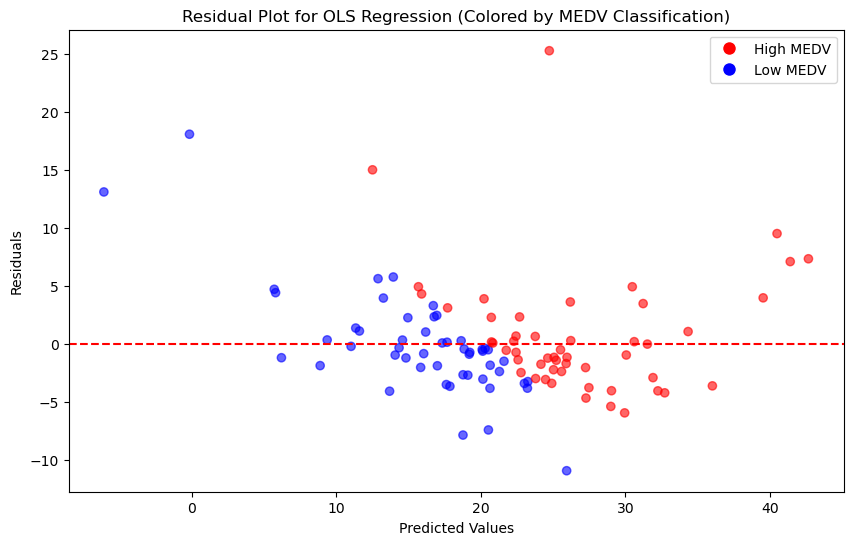

In [6]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Load the training and testing datasets
X_train = train_data.drop('MEDV', axis=1)
y_train = train_data['MEDV']
X_test = test_data.drop('MEDV', axis=1)
y_test = test_data['MEDV']

# Standardize the features (important for KNN and Ridge/LASSO)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

ols = LinearRegression()
ols.fit(X_train_scaled, y_train)

# Predictions
y_train_pred = ols.predict(X_train_scaled)
y_test_pred = ols.predict(X_test_scaled)

# Evaluate the model
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print(f'Training R-squared: {train_r2:.2f}')
print(f'Testing R-squared: {test_r2:.2f}')
print(f'Training MSE: {train_mse:.2f}')
print(f'Testing MSE: {test_mse:.2f}')

# Residual plot
residuals = y_test - y_test_pred
# Define a classification based on MEDV (e.g., high vs. low)
classification = np.where(y_test > np.median(y_test), 'High MEDV', 'Low MEDV')


plt.figure(figsize=(8, 5))
plt.bar(['Training MSE', 'Testing MSE'], [train_mse, test_mse], color=['blue', 'orange'])
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Training and Testing MSE for OLS Regression')
plt.show()


# Plot residuals with color-coded classifications
plt.figure(figsize=(10, 6))
plt.scatter(y_test_pred, residuals, c=np.where(classification == 'High MEDV', 'red', 'blue'), alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot for OLS Regression (Colored by MEDV Classification)')
plt.legend(handles=[
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='High MEDV'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='Low MEDV')
])
plt.show()